In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('datasets_4123_6408_framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Dealing with Missing values

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.drop(columns=['education'], axis=1, inplace=True)

In [8]:
df.shape

(4240, 15)

In [9]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Define the binary columns

In [10]:
df.columns[df.nunique()==2]

Index(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD'],
      dtype='object')

In [11]:
bin_cols=['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp','diabetes']

#### a) Fill missing value for binary features with the most frequent value (mode)

In [12]:
for col in bin_cols:
    mode_val=df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

In [13]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### b) Fill missing value for continues features with the median

In [14]:
df.columns[df.nunique()>2]

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [15]:
num_cols=['cigsPerDay', 'totChol', 'BPMeds', 'BMI', 'heartRate', 'glucose']

In [16]:
for col in num_cols:
    median_value=df[col].median()
    df[col].fillna(median_value, inplace=True)

In [17]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

----------------

### Balance the dataset

<Axes: xlabel='TenYearCHD'>

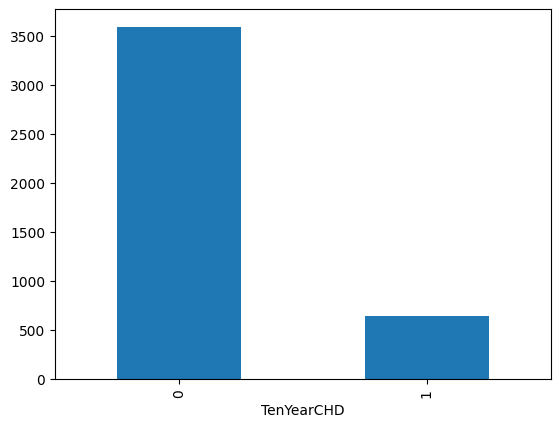

In [18]:
df['TenYearCHD'].value_counts().plot(kind='bar')

#### 1) As you can see our model is imbalanced here. So if we train this model by using this labeled column this will give us the biased results.

#### 2) And for future predictions it will also gives us the result of 0.

#### So we have to solve this issue in here.

In [19]:
from sklearn.utils import resample

In [20]:
# Separate majority and minority classes
df_majority=df[df['TenYearCHD']==0]
df_minority=df[df['TenYearCHD']==1]

# Unsample minorty class
df_minority_unsampled=resample(df_minority,
                               replace=True, # Sample with replacemet
                              n_samples=len(df_majority), # To match majority class
                              random_state=42) # Reproducable results


# Combine majority class with upsampled minority class
df_balanced=pd.concat([df_majority, df_minority_unsampled])

#### Now you can see we have equaly distributed columns

In [21]:
df_balanced['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df_balanced.drop('TenYearCHD', axis=1)
Y=df_balanced['TenYearCHD']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(7192, 14) (5753, 14) (1439, 14)


### Scaling

#### The another way of doing scaling is model will not give any importance of the larger values so we make the scaling where mean is 0 and std is 1.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [29]:
X_train_scaled

array([[-0.94534653,  1.11808982, -1.02232457, ..., -0.23377381,
         0.98834923, -0.05364683],
       [-0.94534653,  1.46628116, -1.02232457, ..., -0.07977247,
        -0.75601814, -0.60258112],
       [-0.94534653, -0.73893065,  0.97816293, ...,  0.02989516,
        -0.5068228 , -0.63487137],
       ...,
       [ 1.05781317, -0.85499443, -1.02232457, ..., -0.3247746 ,
         0.73915389, -0.2796786 ],
       [-0.94534653, -1.55137711, -1.02232457, ..., -0.82411228,
        -1.33747393, -0.89319339],
       [ 1.05781317,  0.53777092,  0.97816293, ..., -0.63744399,
         0.32382832, -0.44112986]])

### Model Training

#### i) RandomForest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier()
rf.fit(X_train_scaled,Y_train)

y_pred=rf.predict(X_test_scaled)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Accuracy Score

In [32]:
accuracy_score(Y_test,y_pred)

0.9687282835302293

#### Confusion Matrix

In [33]:
confusion_matrix(Y_test,y_pred)

array([[660,  36],
       [  9, 734]], dtype=int64)

In [34]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       696
           1       0.95      0.99      0.97       743

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439



#### Importing other models to compare the model performances

In [35]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

In [36]:
classifiers=[
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

#### Create a dictonary to store the results

In [37]:
ressults={}

#### Train and evaluate each results

In [43]:
for clf in classifiers:
    clf_name=clf.__class__.__name__
    clf.fit(X_train_scaled, Y_train)
    y_pred=clf.predict(X_test_scaled)

    print(clf_name)
    print("*********************")
        
    # Calculating Accuracy
    accuracy=accuracy_score(Y_test,y_pred)
    print("Accuracy is: ",accuracy)

    # Classification Report
    report=classification_report(Y_test,y_pred)
    print("Classification Report is: ")
    print(report)

    # Confusion Matrix
    mat=confusion_matrix(Y_test,y_pred)
    print("Confusion Matrix is: ")
    print(mat)

    print("="*100)

RandomForestClassifier
*********************
Accuracy is:  0.9722029186935371
Classification Report is: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       696
           1       0.95      0.99      0.97       743

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439

Confusion Matrix is: 
[[661  35]
 [  5 738]]


C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier
*********************
Accuracy is:  0.6685198054204309
Classification Report is: 
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       696
           1       0.68      0.69      0.68       743

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439

Confusion Matrix is: 
[[452 244]
 [233 510]]
GradientBoostingClassifier
*********************
Accuracy is:  0.7143849895760945
Classification Report is: 
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       696
           1       0.72      0.74      0.73       743

    accuracy                           0.71      1439
   macro avg       0.71      0.71      0.71      1439
weighted avg       0.71      0.71      0.71      1439

Confusion Matrix is: 
[[476 220]
 [191 552]]
LogisticRegression
*********************
Accur

## Selecting our best model as RandomForest Classifier

In [51]:
# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, Y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(Y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(Y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9742876997915219
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       696
           1       0.96      0.99      0.98       743

    accuracy                           0.97      1439
   macro avg       0.98      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439

Confusion Matrix for Random Forest Classifier:
[[664  32]
 [  5 738]]


## Prediction

#### Predicted Class

In [55]:
rf_classifier.predict(X_test_scaled[10].reshape(1,-1))[0]

0

#### Actual Class

In [56]:
Y_test.iloc[10]

0

## Saving the models

In [57]:
import pickle

pickle.dump(rf_classifier,open("rf_classifier.pkl", 'wb'))
pickle.dump(sc,open("sc.pkl", 'wb'))

## Prediction Function

In [61]:
def predict(rf_classifier, sc, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose):
    # Encode Categorical variables
    male_encoded = 1 if male.lower() == "male" else 0
    currentSmoker_encoded = 1 if currentSmoker.lower() == "yes" else 0
    BPMeds_encoded = 1 if BPMeds.lower() == "yes" else 0
    prevalentStroke_encoded = 1 if prevalentStroke.lower() == "yes" else 0
    prevalentHyp_encoded = 1 if prevalentHyp.lower() == "yes" else 0
    diabetes_encoded = 1 if diabetes.lower() == "yes" else 0

    # Prepare features array
    features=np.array([[male_encoded, age, currentSmoker_encoded, cigsPerDay, BPMeds_encoded, prevalentStroke_encoded, prevalentHyp_encoded, diabetes_encoded, totChol, sysBP, diaBP, BMI, heartRate, glucose]])

    # Scaling
    scaled_features=sc.transform(features)

    # Predict by model
    result=rf_classifier.predict(scaled_features)

    return result[0]
    

### Test case 1

In [64]:
male = "female"
age = 56.00
currentSmoker = "yes"
cigsPerDay = 3.00
BPMeds = "no"
prevalentStroke = "no"
prevalentHyp = "yes"
diabetes = 'no'
totChol = 285.00
sysBP = 145.00
diaBP = 100.00
BMI = 30.14
heartRate = 80.00
glucose = 86.00


result = predict(rf_classifier, sc, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)


if result == 1:
    print("The Patient has Heart Disease")
else: 
    print("The Patiennt has No Heart Disease")

The Patiennt has No Heart Disease


C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Test case 2

In [65]:
male = 'female'
age = 63.0
currentSmoker = 'yes'
cigsPerDay = 3.0
BPMeds = 'no'
prevalentStroke = 'no'
prevalentHyp = 'yes'
diabetes = 'no'
totChol = 267.0
sysBP = 156.5
diaBP = 92.5
BMI = 27.1
heartRate = 60.0
glucose = 79.0
result = 1.0

result = predict(rf_classifier, sc, male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose)


if result == 1:
    print("The Patient has Heart Disease")
else: 
    print("The Patiennt has No Heart Disease")

The Patient has Heart Disease


C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
